<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #8 : Linear Model Assumptions

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Example 8.1: Nutrition Data

Consider the following data collected on a variety of menu items from various fast-food restaurants.  
<table>
  <tr>
    <td width='50%'>
      <ul>
          <li>Restaurant: Name of restaurant</li>
          <li>Item: Menu item</li>
          <li>Type: Type of menu item, e.g. sub, pizza, wrap, sandwich, etc</li>
          <li>Breakfast: Is this primarily a breakfast item</li>
          <li>ServingSize: Serving Size</li>
          <li>Calories: Calories per serving</li>
          <li>TotalFat: Total fat per serving</li>
          <li>SaturatedFat: Saturated fat per serving</li>
          <li>Cholesterol: Cholesterol per serving</li>
          <li>Sodium: Sodium per serving</li>
          <li>TotalCarbs: Total carbs per serving</li>
          <li>Fiber: Fiber per serving</li>
          <li>Sugar: Sugar per serving</li>
          <li>Protein: Protein per serving</li>
        </ul>
    </td>
  <td width='50%'><p align='center'><img src="https://drive.google.com/uc?export=view&id=1xqpwzKXlYfqugyObQU0SDl5LPo73g2ie" width='50%' height='50%'></img></p
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R

First, load the tidyverse package.

In [ ]:
#load the tidyverse package
library(tidyverse)

Next, load the Nutrition dataset into R using read_csv().

In [ ]:
# Reading data in using read_csv 
Nutrition <- read_csv("http://www.StatsClass.org/stat360/Datasets/Nutrition.csv")

Next, taking a look at the Nutrition dataset.

In [ ]:
#View the first few rows of data
head(Nutrition)

## SLR: Model Setup

Consider *only* the data from Wendy's along with the following setup for the simple linear regression model.

<ul>
  <li><strong>Restaurant</strong>: Wendys</li>
  <li><strong>Response Variable</strong>: SaturatedFat</li>
  <li><strong>Independent / Predictor Variable</strong>: Calories</li>
  <li><i>Assume</i> the following structure for the mean and variance functions</li>
  </ul>

<ul><ul>
  <li>$E(SaturatedFat | Calories, Restaurant = Wendys) = \beta_{0} + \beta_{1} * Calories$</li>
  <li>$Var(SaturatedFat | Calories, Restaurant = Wendys) = \sigma^{2}$</li>
</ul></ul>

The following snipit of code can be used to filter() the data down to just $Restaurant = Wendys$

In [ ]:
(Nutrition
  %>% filter(Restaurant == "Wendys")
  %>% select(Restaurant, Item, SaturatedFat, Calories)
) -> Wendys

Before preceding, check the data.frame to ensure that the filtering/selecting was done correctly.

In [ ]:
#Taking a look at the Wendys data.frame
Wendys

## SLR - Analysis

First, getting a scatterplot with the simple linear regression line.

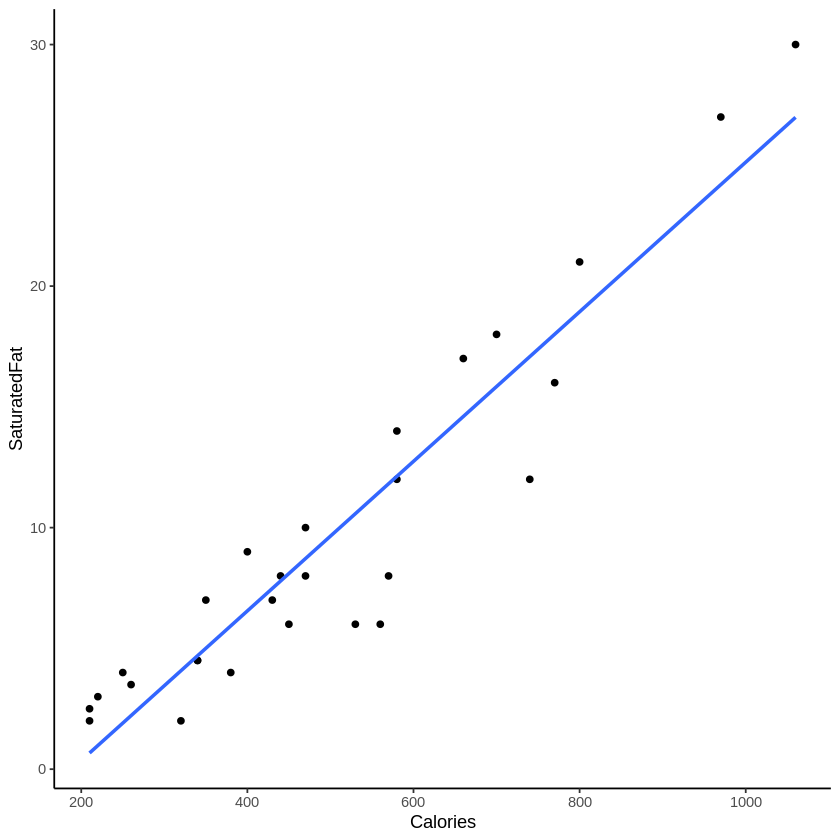

In [ ]:
# Scatterplot with simple linear regression line
ggplot(data=Wendys, aes(x=Calories,y=SaturatedFat)) + 
  geom_point() +   
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +
  theme_classic()

Next, let's fit the simple linear regression model.

In [ ]:
#Fitting the simple linear regression model
WendysLinearModel_SaturatedFat_Calories <- lm(SaturatedFat ~ Calories, data=Wendys)

Getting the simple linear regression output.

In [ ]:
#Getting a summary of the model
summary(WendysLinearModel_SaturatedFat_Calories)


Call:
lm(formula = SaturatedFat ~ Calories, data = Wendys)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5057 -1.9513  0.7454  2.0320  3.0130 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.833332   1.208443  -4.827 5.30e-05 ***
Calories     0.030963   0.002205  14.044 1.19e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.564 on 26 degrees of freedom
Multiple R-squared:  0.8835,	Adjusted R-squared:  0.8791 
F-statistic: 197.2 on 1 and 26 DF,  p-value: 1.19e-13


Getting the 95% Confidence Intervals for the parameters in the model, i.e. $\beta_{0}$ and $\beta_{1}$ 

In [ ]:
#Getting CIs for model parameters
confint(WendysLinearModel_SaturatedFat_Calories)

,2.5 %,97.5 %
(Intercept),-8.31732270,-3.34934221
Calories,0.02643087,0.03549421


## Theoretical Considerations

The correctness of the hypothesis tests for the model parameters and the computations of the 95% confidence intervals relies on the following theoretical conditions. 

*   Mean: $E(Y | X) = \beta_{0} + \beta_{1}*X$
*   Variance: $E(Y | X) = \sigma^{2}$
*   $Y_{i}$ are *independent* of one another
*   Distribution of $Y$ is $Normal$



Next, consider the form of a simple linear regression model.

$$Y_{i} = \beta_{0} + \beta_{1}*x_{i} + \epsilon_{i}$$

where

*  $Y_{i}$:  the value of the response variable for observation $i$
*  $\beta_{0}$: y-intercept
*  $\beta_{1}$: slope
*  $x_{i}$:  the value of the predictor variable for observation $i$
*  $\epsilon_{i}$: the error (residual) term for observation $i$


The mathematical representation for each observation in our dataset has the following form.

$$\begin{array}{ccc}
Y_{1} & = & \beta_{0} * 1 + \beta_{1} * x_{1} + \epsilon_{1} \\
Y_{2} & = & \beta_{0} * 1 + \beta_{1} * x_{2} + \epsilon_{2} \\
Y_{3} & = & \beta_{0} * 1 + \beta_{1} * x_{3} + \epsilon_{3} \\
\vdots & = & \vdots  \\ 
\vdots & = & \vdots \\ 
Y_{27} & = & \beta_{0} * 1 + \beta_{1} * x_{27} + \epsilon_{27} \\
Y_{28} & = & \beta_{0} * 1 + \beta_{1} * x_{28} + \epsilon_{28} \\
\end{array}
$$

For our observed data, the mathematical representation is as follows.

$$\begin{array}{ccc}
14 & = & -5.8333 * 1 + 0.03096 * 580 + 1.88 \\
21 & = & -5.8333 * 1 + 0.03096 * 800 + 2.06 \\
30 & = & -5.8333 * 1 + 0.03096 * 1060 + 3.01 \\
\vdots & = &  \vdots \\ 
\vdots & = &   \vdots \\ 
2.0 & = & -5.8333 * 1 + 0.03096 * 320 + -2.07 \\
2.5 & = & -5.8333 * 1 + 0.03096 * 210 + 1.83 \\
\end{array}
$$

Consider the following two components of the simple linear regression equation.

$$Y_{i} = \underbrace{\beta_{0} + \beta_{1}*x_{i}}_{\mbox{Mean}} + \underbrace{\epsilon_{i}}_{\mbox{Variance}}$$

If the conditional distribution of $Y|X$ is $Normal$ with mean equal to $\beta_{0} + \beta_{1}*x_{i}$ and variance equal to $\sigma^{2}$, then the following expression is used to represent the distributional assumptions for the conditional distribution.

$$ Y_{i} | X=x_{i} \sim N(\beta_{0} + \beta_{1}*x_{i} \space, \space \sigma^{2})
$$

*   Mean: $E(Y_{i}|X=x_{i})= \beta_{0} + \beta_{1} * x_{i}$
*   Variance: $Var(Y_{i}|X=x_{i}) = Var(\epsilon_{i}) = \sigma^{2}$



Some people emphasize the fact that the variability in the conditional distribution of  $Y_{i} | X=x_{i}$  comes *solely* from the error term with the following distributional property for the error (or residual) term. 

$$ \begin{array}{rcl}
\epsilon_{i} & \sim & N(0,\sigma^2) \space for \space all \space i , \space and \space COV(\epsilon_{i}, \epsilon_{j})=0 \space for \space all \space i \ne j\\
& \sim & \space iid\space N(0,\sigma^2) 
\end{array}
$$

A *visual* depiction  of the theoretical assumptions is provided here.

<table>
  <tr>
    <td align="center" width="50%" valign="top" ><font size="+1">SaturatedFat | Calories = 580</font></td>
    <td align="center" width="50%" valign="top" ><font size="+1">SaturatedFat | Calories = 900</font></td>
  </tr>
  <tr>
    <td align="center" valign="top" width="50%"><img src="https://drive.google.com/uc?export=view&id=1G8gwhqvx1ZPnyvA6qjRwdLikDoTH5pRX" width='75%' height='75%'></td>
    <td align="center" width="50%" valign="top"><img src="https://drive.google.com/uc?export=view&id=145TuewjvdlAQb8KTrn4Q0kqZs-a-MtMI" width='75%' height='75%'></img></td>
  </tr>
</table>

Of course, the theoretical consideration apply to any $X=x_{i}$ value.

<table>
  <tr>
    <td align="center" width="50%" valign="top" ><font size="+1">Generalizes to any X</font></td>
  </tr>
  <tr>
    <td align="center" valign="top"><img src="https://drive.google.com/uc?export=view&id=1Mz9qjtH5pPjf8bx80lXq0cLbj-azKsOH" width='50%' height='50%'></td>
  </tr>
</table>

Another common view of this picture is to turning the graph to the left and pushing it over on its back which allows one to more easily see the normality assumption for the conditional distributions.<br><img src="https://drive.google.com/uc?export=view&id=1iRam17Ygi8G3dDuClG_7pFjU3PcgizVo"></img>

<table width='100%'><tr><td bgcolor="orange"><font color="white" size="+2">Aside - Matrix Representation</font></td></tr></table>


In matrix notation, the above can be expressed as follows.

$$\mathbf{Y} = \mathbf{X} \underline{\mathbf{\beta}} + \underline{\mathbf{\epsilon}}  
$$

or explicitly written as

$$
\begin{array}{rcl}
\left[
  \begin{array}{c}
  Y_{1} \\
  Y_{2} \\
  Y_{3} \\
  \vdots \\
  \vdots \\
  Y_{27} \\
  Y_{28} \\
  \end{array}
\right]
 & = & 
  \left[
    \begin{array}{cc}
    1 & x_{1} \\
    1 & x_{2} \\
    1 & x_{3} \\
    \vdots & \vdots \\
    \vdots & \vdots \\
    1 & x_{27} \\
    1 & x_{28} \\
    \end{array}
  \right]
  & 
  \left[
    \begin{array}{c}
      \beta_{0} \\ 
      \beta_{1} \\ 
    \end{array}
  \right] & + & 
  \left[
    \begin{array}{c}
    \epsilon_{1} \\
    \epsilon_{2} \\
    \epsilon_{3} \\
    \vdots \\
    \vdots \\
    \epsilon_{27} \\
    \epsilon_{28} \\
    \end{array}
  \right]
   \\
\end{array}
$$

The observed data is expressed as follows when using matrix notaiton. 

$$\hat{\mathbf{Y}} = \mathbf{X} \underline{\hat{\mathbf{\beta}}} + \underline{\mathbf{\hat{\epsilon}}}  
$$

or explicitly written as

$$
\begin{array}{rcl}
\left[
  \begin{array}{c}
  14 \\
  21 \\
  30 \\
  \vdots \\
  \vdots \\
  2.0 \\
  2.5 \\
  \end{array}
\right]
 & = & 
  \left[
    \begin{array}{cc}
    1 & 580 \\
    1 & 800 \\
    1 & 1060 \\
    \vdots & \vdots \\
    \vdots & \vdots \\
    1 & 320 \\
    1 & 210 \\
    \end{array}
  \right]
  & 
  \left[
    \begin{array}{c}
      -5.83333 \\ 
      0.03096 \\ 
    \end{array}
  \right] & + & 
  \left[
    \begin{array}{c}
    1.88 \\
    2.06 \\
    3.01 \\
    \vdots \\
    \vdots \\
    -2.07 \\
    1.83 \\
    \end{array}
  \right]
   \\
\end{array}
$$

If the conditional distribution of $\mathbf{Y}|\mathbf{X}$ is $Normal$ with mean equal to $\mathbf{X}\underline{\mathbf{\beta}}$ and constant variance equal to $\sigma^{2}$, then the following expression is used to represent the distributional assumptions for the conditional distribution when using matrix notation.

$$ \mathbf{Y}|\mathbf{X} \sim N(\mathbf{X}\underline{\mathbf{\beta}} \space , \space \sigma^{2} \mathbf{I} ) 
$$

where $\mathbf{I}_{nxn}$ identity matrix. Some express the fact that the variablity comes *solely* from the error term using the following expression. 

$$\underline{\mathbf{\epsilon}} \sim N(\underline{\mathbf{0}} \space , \space \sigma^{2}*\mathbf{I})
$$

which written out explicitly is

$$\begin{array}{rcl}
\left[
  \begin{array}{c}
  \epsilon_{1} \\
  \epsilon_{2} \\
  \epsilon_{3} \\
  \vdots \\
  \vdots \\
  \epsilon_{27} \\
  \epsilon_{28} \\
  \end{array}
\right] & \sim & 
N
\left(
  \left[
    \begin{array}{c}
     0 \\
     0 \\
     0 \\
     \vdots \\
     \vdots \\
     0 \\
     0 \\
    \end{array}
  \right] , \space \space \sigma^{2} * 
  \left[
    \begin{array}{ccccccc}
    1 & 0 & 0 & \cdots & \cdots & 0 & 0 \\
    0 & 1 & 0 & \cdots & \cdots & 0 & 0 \\
    0 & 0 & 1 & \cdots & \cdots & 0 & 0 \\
    \vdots & \vdots & \vdots & \ddots & \ddots & \vdots & \vdots \\ 
    \vdots & \vdots & \vdots & \ddots & \ddots & \vdots & \vdots \\ 
     0 & 0 & 0 & \cdots & \cdots & 1 & 0 \\
     0 & 0 & 0 & \cdots & \cdots & 0 & 1 \\
    \end{array}
  \right]
\right)
\end{array}
$$

<table width='100%'><tr><td bgcolor="orange"><font color="white" size="+2">&nbsp;</font></td></tr></table>


## Checking the Assumptions

Recall, the following set of theoretical assumptions for a simple linear regression model.

*   Correct Mean: $E(Y | X) = \beta_{0} + \beta_{1}*X$
>  **How is this assumption checked:**  $Residual$ vs $Predicted$ scatterplot (and possibly $Residual$ vs $Predictor \space Variable$ scatterplot)<br>**Desired Outcome:** Random scatter above and below $y=0$ line
<br><br>**Comment**: An alternative plot to verify correct functional form is to create a scatterplot of the $Actual$ vs $Predicted$.  Points on this scatterplot should fall on the $y=x$ line.
*   Constant Variance: $E(Y | X) = \sigma^{2}$
>  **How is this assumption checked:**  $Residual$ vs $Predicted$ scatterplot (or $|Residuals|$ vs $Predicted$ scatterplot)
<br>**Desired Outcome:** No funnel shape (or no trend present)
*   Independence: $Y_{i}$ are *independent* of one another $\Leftrightarrow$ $Residuals$ are *independent* of one another
>  **How is this assumption checked:**  $Residual$ vs $Predicted$ scatterplot
<br>**Desired Outcome:** No auto-correlation present
*  Normality:  Distribution of $Y$ is $Normal$ $\Leftrightarrow$ $Residuals$ are $Normal$
>  **How is this assumption checked:**  Histogram of $Residuals$ (or $qqnorm$ plot of $Residuals$)
<br>**Desired Outcome:** bell-shaped histogram (or straight line on qqnorm plot)

### Correct Form for the Mean

*    **Plot**:  $Residual$ vs $Predicted$ (and, if needed $Residual$ vs each $Predictor \space Variable$)

*   **Visual Inspection**: Random scatter above and below $y=0$ line
*    **Formal Procedure**: None



<table>
  <tr>
    <td align="center" width="50%" valign="top" ><font size="+2">Good</font></td>
    <td align="center" width="50%" valign="top" ><font size="+2">Bad</font></td>
  </tr>
  <tr>
    <td align="center" valign="top" width="50%"><img src="https://drive.google.com/uc?export=view&id=1DrVMGkeZ_5iafQ1JshqyGiPW7FLS3kMz" width='75%' height='75%'></td>
    <td align="center" width="50%" valign="top"><img src="https://drive.google.com/uc?export=view&id=12Zxpw8UVTqDE6-ufjzXJgfF6tpurlSI9" width='75%' height='75%'><br><br><font size="+1">OR</font><br><br>
    <img src="https://drive.google.com/uc?export=view&id=134jwfqi-m8oWoK-u_fJHJzb_0jO6Kq5t" width='75%' height='75%'></td>
  </tr>
</table>

### Constant Variance

*    **Plot**:  $Residual$ vs $Predicted$ scatterplot (or $|Residual|$ vs $Predicted$ scatterplot)

*   **Visual Inspection**: No funnel shape (or no trend present)
*    **Formal Procedure**: Statistical test for trend in $|Residual|$ vs $Predicted$ scatterplot



<table>
  <tr>
    <td align="center" width="50%" valign="top" ><font size="+2">Good</font></td>
    <td align="center" width="50%" valign="top" ><font size="+2">Bad</font></td>
  </tr>
  <tr>
    <td align="center" valign="top" width="50%"><img src="https://drive.google.com/uc?export=view&id=1DrVMGkeZ_5iafQ1JshqyGiPW7FLS3kMz" width='75%' height='75%'></td>
    <td align="center" width="50%" valign="top"><img src="https://drive.google.com/uc?export=view&id=1oqkJ7guSPIqBRf9o-xPW0oHaproqJrci" width='75%' height='75%'><br><br><font size="+1">OR</font><br><br>
    <img src="https://drive.google.com/uc?export=view&id=1dkeArk2HEzx2_xxFsMqgNC5h_jnS2GWX" width='75%' height='75%'></td>
  </tr>
</table>

### Independence

*    **Plot**:  $Residual$ vs $Predicted$ scatterplot
*   **Visual Inspection**: No auto-correlation present (no snake pattern or extreme bouncing back-and-forth) 
*    **Formal Procedure**: Durbin-Watson Test for auto-correlation



<table>
  <tr>
    <td align="center" width="50%" valign="top" ><font size="+2">Good</font></td>
    <td align="center" width="50%" valign="top" ><font size="+2">Bad</font></td>
  </tr>
  <tr>
    <td align="center" valign="top" width="50%"><img src="https://drive.google.com/uc?export=view&id=1DrVMGkeZ_5iafQ1JshqyGiPW7FLS3kMz" width='75%' height='75%'></td>
    <td align="center" width="50%" valign="top"><img src="https://drive.google.com/uc?export=view&id=19jQWcUDkugI6mfUdgtBSQMF08-cnfI1F" width='75%' height='75%'><br><br><font size="+1">OR</font><br><br>
    <img src="https://drive.google.com/uc?export=view&id=1l7k4cG23oKj6EmlfQVFIeaNLakZFg088" width='75%' height='75%'></td>
  </tr>
</table>

### Normality

*    **Plot**:  Histogram of $Residuals$ (or QQ-Normal Plot of $Residuals$)
*   **Visual Inspection**: Bell-shaped pattern (or straight line in qq plot). 
*    **Formal Procedure**: Formal tests for normality do exist, but are rarely used in practice in this setting


<table>
  <tr>
    <td align="center" valign="top" ><font size="+2">Good</font></td>
  </tr>
  <tr>
    <td align="center" valign="top"><font size="+1">Histogram of Residuals</font><br><img src="https://drive.google.com/uc?export=view&id=12e3q4M2QOO99s-5ZDWOGwMpn39KWubYZ" width='50%' height='50%'>
    <br><br><font size="+1">OR<br><br>QQ-Normal Plot of Residuals</font><br>
   <img src="https://drive.google.com/uc?export=view&id=1QyuMnsb2uWxa54no-cRpgEYrkUHWb8vJ" width='50%' height='50%'> <br>Source: https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0
    </td>
  </tr>
</table>

## Checking Assumptions for our SLR Model

To verify the assumptions, the predicted values and residuals from the fit are needed.  The predict() function can be used to obtain a prediction.  However, the linear model object in R contains the predicted values (or fitted values) and residuals for all observations used to build the model.

*   **Predicted Values**:WendysLinearModel_SaturatedFat_Calories\$fitted.values
*   **Residuals**: WendysLinearModel_SaturatedFat_Calories\$residuals


In [ ]:
names(WendysLinearModel_SaturatedFat_Calories)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

Next, lets create data.frame that includes the predicted values and residuals for each observation used to construct the model.

In [ ]:
#Using predict() function
#(Wendys
# %>% mutate(
#            Predicted_SaturatedFat = predict(WendysLinearModel_SaturatedFat_Calories, newdata = Wendys),
#            Residual = (SaturatedFat - Predicted_SaturatedFat)
#           )
# ) -> Wendys_with_Predicted_and_Residuals

#Using fitted.values and residuals from model object
(Wendys
  %>% mutate(
             Predicted_SaturatedFat = WendysLinearModel_SaturatedFat_Calories$fitted.values,
             Residual = WendysLinearModel_SaturatedFat_Calories$residuals
            )
) -> Wendys_with_Predicted_and_Residuals

head(Wendys_with_Predicted_and_Residuals)

Next, using ggplot() to create the $Residuals$ vs $Predicted$ scatterplot 

In [ ]:
#Getting the Residuals vs Predicted Values scatterplot
ggplot(data=Wendys_with_Predicted_and_Residuals, aes(x=Predicted_SaturatedFat,y=Residual)) + 
  geom_point() + 
  geom_hline(yintercept=0, linetype="dashed") +
  ylim(-6, 6) +   
  theme_bw()

**Comment**:  If problems present themselves in this plot, it may be necessary to plot the $Residual$ vs $Predictor \space Variables$ to investigate further.

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions

Using the $Residuals$ vs $Predicted$ scatterplot, verify the following assumptions:

1.  Correct Function Form for Mean:
2.  Constant Variance
3.  Independence:

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">&nbsp;</font></td></tr></table>

An sufficient alternative to constructing the above ggplot is to simply pass the linear model object through the basic plot() function in R.  Specify which=1 for the Residuals vs Predicted plot.

In [ ]:
#pass linear model object through generic plot() function
#specify which=1 for Residuals vs Predicted
plot(WendysLinearModel_SaturatedFat_Calories, which=1)

Next, getting a histogram of the $Residuals$ to check normality condition.

In [ ]:
#Getting the Residuals vs Predicted Values scatterplot
ggplot(data=Wendys_with_Predicted_and_Residuals, aes(x=Residual)) + 
  geom_histogram(aes(y=..density..), bins=6) + 
  geom_density() + 
  stat_function(fun = dnorm,
                args = list(mean = c(0), #Mean of residuals is 0 for a linear model
                            sd = c(2.564)), #RMSE value is the stadard deviation in residuals
                col = "darkgreen",
                size = 1)+
  theme_classic()

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions

Using the histogram of the $Residuals$ to verify the normality assumption:

4.  Normality Assumption: 

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">&nbsp;</font></td></tr></table>

If the linear model object is passed through the plot() function with $which=2$, a quantile-quantile normal plot of the $Residuals$ is created. 

In [ ]:
plot(WendysLinearModel_SaturatedFat_Calories, which=2)

## Using car Package

The **car** package is an R package that can be used to assist you with doing a regression analysis.  This R package includes functions to accompany J. Fox and S. Weisberg book titled "An R Companion for Applied Regression.

Source:  [Webpage](tinyurl.com/carbook) for An R Companion for Applied Regression

**Note**:  The car package takes about 5 minutes to download into Google Colab.

In [ ]:
#download the car package
install.packages("car")

Next, install the car() package into this COLAB session.

In [ ]:
#Install the car package into this COLAB session
library(car)

The car package includes a function called durbinWatsonTest() that can be used to check the **independence** assumption of a liner model. 

The statistical hypothesis for a Durbin-Watson test is given by the following.  For more information on the Durbin-Watson test, see it's [Wiki Page](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic).

$$\begin{array}{rcl}
H_{0} & : & \mbox{No auto-correlation present} \\
H_{A} & : & \mbox{Auto-correlation present} \\
\end{array}
$$

In [ ]:
durbinWatsonTest(WendysLinearModel_SaturatedFat_Calories)

 lag Autocorrelation D-W Statistic p-value
   1       0.2677706      1.424273   0.092
 Alternative hypothesis: rho != 0

An alternative QQ-Normal plot is provided by the car() package.  This is shown here.

[1]  5 18

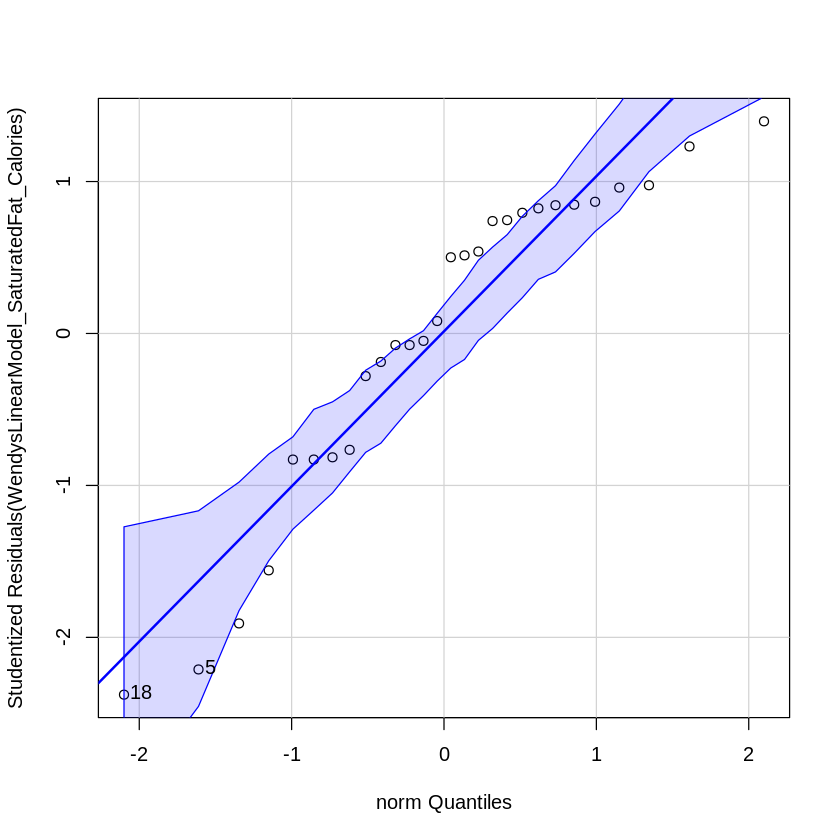

In [ ]:
#The qqplot() function is from the car package
qqPlot(WendysLinearModel_SaturatedFat_Calories, distribution="norm")

## Outlier Detection

One last consideration is the identification of $outliers$. Outliers do not necessarily impact the theoretical considerations, but extreme outliers should be identified.  There are more formal rules for the identification of outliers, but an approximate rule for determining outliers is given by

 $$ |Residual| >  2 *RMSE$$

In [ ]:
#Taking a look at the residuals for each food item
WendysLinearModel_SaturatedFat_Calories$residuals

The which() function in R can be used to quickly identify observations that are outliers.

In [ ]:
#Identify rows that are outliers...
#The RMSE value from our model is 2.564
which( abs(WendysLinearModel_SaturatedFat_Calories$residuals) > 2 * 2.564) 

The following snipit of code can be used to identify the item (row = 18) from the data.frame that contains the predicted values and the residuals.

In [ ]:
Wendys_with_Predicted_and_Residuals[18,]

Consider the following $Residual$ vs $Predicted$ scatterplot.  This plot includes horizontal lines to identify any outliers. 

In [ ]:
#Getting the Residuals vs Predicted Values scatterplot
ggplot(data=Wendys_with_Predicted_and_Residuals, aes(x=Predicted_SaturatedFat,y=Residual)) + 
  geom_point() + 
  geom_hline(yintercept=0, linetype="dashed") +
  geom_hline(yintercept=+5.128, color="red") +
  geom_hline(yintercept=-5.128, color="red") +
  ylim(-6, 6) +  
  theme_bw()

A variation of the plot above, is to use Food Item name as a label.  As we can see from this plot, "chicken" food items tend to be over-predicted.

In [ ]:
#Getting the Residuals vs Predicted Values scatterplot
ggplot(data=Wendys_with_Predicted_and_Residuals, aes(x=Predicted_SaturatedFat,y=Residual, label=Item)) + 
  geom_point() + 
  geom_text()+ 
  geom_hline(yintercept=0, linetype="dashed") +
  geom_hline(yintercept=+5.128, color="red") +
  geom_hline(yintercept=-5.128, color="red") +
  ylim(-6, 6) +  
  theme_bw()



---



---
End of Document

